# Music & Mental Health Data Analysis: Feature Engineering


## Description  
This notebook focuses on the evaluation and implementation of encoding techniques following the imputation of missing values in the *Music & Mental Health* dataset. This is a critical preprocessing step in preparing the data for machine learning models.

## Objectives  
- Load and review the dataset after imputation  
- Identify categorical features requiring encoding  
- Apply and compare encoding methods such as One-Hot Encoding, Label Encoding, and Ordinal Encoding as appropriate  
- Ensure the encoded data preserves the integrity and distribution of the original variables  
- Validate that the resulting dataset is ready for modeling

## Dataset Source  
- [Music & Mental Health Dataset on Kaggle](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)

## Notes  
- This notebook is part of a larger data science pipeline aimed at exploring the relationship between music preferences and mental health indicators  
- All preprocessing choices will be documented and justified in context


In [282]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [283]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Oversampling
from imblearn.over_sampling import SMOTENC

# Statistics
from scipy import stats

from music_and_mental_health_survey_analysis.config import (
    INTERIM_DATA_DIR, FIGURES_DIR
)
from music_and_mental_health_survey_analysis.dataset import (
    load_config_file
)

# Encoding

Check encoding of features in preparation for modeling.

In [284]:
df = pd.read_csv(INTERIM_DATA_DIR / 'encoded_features.csv')
df.head()

,Age,Hours per day,BPM,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Fav genre_Classical,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,Fav genre_Hip hop,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music
0,18.0,3.0,156.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,63.0,1.5,119.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,18.0,4.0,132.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61.0,2.5,84.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,4.0,107.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [285]:
# Check columns

df.columns

Index(['Age', 'Hours per day', 'BPM', 'While working', 'Instrumentalist',
       'Composer', 'Exploratory', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Primary streaming service_Apple Music',
       'Primary streaming service_I do not use a streaming service.',
       'Primary streaming service_Other streaming service',
       'Primary streaming service_Pandora',
       'Primary streaming service_Spotify',
       'Primary streaming service_YouTube Music', 'Fav genre_Classical',
       'Fav genre_Country', 'Fav genre_EDM', 'Fav genre_Folk',
       'Fav genre_Gosp

In [286]:
# Check for duplicate columns

print(f"Duplicated columns: {', '.join(df.columns[df.columns.duplicated()])}")

Duplicated columns: 


In [287]:
# Check for missing values

print(f"Columns with missing values: {df.columns[df.isna().sum() > 0]}")

Columns with missing values: Index([], dtype='object')


In [288]:
# Check distributions for anomalies

df.describe()

,Age,Hours per day,BPM,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Fav genre_Classical,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,Fav genre_Hip hop,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.00000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,24.988333,3.460486,123.229167,0.791667,0.320833,0.170833,0.713889,0.554167,1.333333,0.822222,1.020833,1.016667,0.377778,1.393056,1.029167,0.731944,0.602778,1.077778,1.209722,2.056944,1.265278,1.333333,2.077778,1.254167,5.831944,4.786111,3.719444,2.595833,1.726389,0.069444,0.095833,0.068056,0.01250,0.623611,0.130556,0.073611,0.034722,0.048611,0.040278,0.006944,0.047222,0.027778,0.036111,0.004167,0.013889,0.116667,0.158333,0.047222,0.027778,0.256944,0.059722
std,11.607445,2.625094,29.578081,0.406399,0.467121,0.376625,0.452256,0.497403,0.989514,0.922026,1.049993,1.011615,0.692945,1.029310,0.937837,1.001574,0.862118,1.027876,1.130763,0.923097,1.056362,1.052185,1.031927,1.073442,2.783486,3.017119,3.068827,2.812496,0.496299,0.254385,0.294567,0.252016,0.11118,0.484816,0.337148,0.261319,0.183203,0.215203,0.196747,0.083101,0.212261,0.164450,0.186696,0.064460,0.117111,0.321246,0.365307,0.212261,0.164450,0.437252,0.237136
min,10.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,105.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,1.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,3.000000,120.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.000000,5.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,5.000000,140.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000

In [289]:
# Check binary column values

binary_cols = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']
df[binary_cols].nunique()

While working        2
Instrumentalist      2
Composer             2
Exploratory          2
Foreign languages    2
dtype: int64

In [290]:
# Check ordinal ranges

freq_cols = [col for col in df.columns if col.startswith('Frequency')]
df[freq_cols].apply(pd.Series.value_counts)

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0.0,166,333,302,284,524,174,254,408,435,270,260,51,217,196,88,230
1.0,254,230,188,218,132,210,243,172,168,208,189,134,209,210,93,193
2.0,194,109,143,140,52,215,171,65,85,158,131,258,180,192,214,181
3.0,106,48,87,78,12,121,52,75,32,84,140,277,114,122,325,116


In [291]:
# Check dummy cols

[col for col in df.columns if "Fav genre" in col or "Primary" in col]

['Primary streaming service_Apple Music',
 'Primary streaming service_I do not use a streaming service.',
 'Primary streaming service_Other streaming service',
 'Primary streaming service_Pandora',
 'Primary streaming service_Spotify',
 'Primary streaming service_YouTube Music',
 'Fav genre_Classical',
 'Fav genre_Country',
 'Fav genre_EDM',
 'Fav genre_Folk',
 'Fav genre_Gospel',
 'Fav genre_Hip hop',
 'Fav genre_Jazz',
 'Fav genre_K pop',
 'Fav genre_Latin',
 'Fav genre_Lofi',
 'Fav genre_Metal',
 'Fav genre_Pop',
 'Fav genre_R&B',
 'Fav genre_Rap',
 'Fav genre_Rock',
 'Fav genre_Video game music']

In [292]:
# Check if any columns non-numeric

df.select_dtypes(exclude='number').columns

Index([], dtype='object')

In [293]:
df['Music effects'].unique()

array([2., 1., 0.])

# Balancing Data

In [294]:
# Convert datatypes to list categorical

dtypes = load_config_file()
columns = [col.split('_')[0] for col in df.columns]

for col in df.columns:
    if col in dtypes:
        lookup_name = col
    else:
        lookup_name = col.split('_')[0]

    dtype = dtypes.get(lookup_name)

    if dtype.get('type') == 'numeric':
        df[col] = df[col].astype(dtype=int)
    else:
        df[col] = df[col].astype(dtype=pd.CategoricalDtype())

df.dtypes

Age                                                               int64
Hours per day                                                     int64
BPM                                                               int64
While working                                                  category
Instrumentalist                                                category
Composer                                                       category
Exploratory                                                    category
Foreign languages                                              category
Frequency [Classical]                                          category
Frequency [Country]                                            category
Frequency [EDM]                                                category
Frequency [Folk]                                               category
Frequency [Gospel]                                             category
Frequency [Hip hop]                                            c

In [295]:
# Split data into features and target

X = df.drop(labels=['Music effects'], axis=1)
y = df['Music effects'].astype(int)

# Get indeces of categorical features for SMOTE-NC
categorical_cols = X.select_dtypes(include='category')
cat_cols_indeces = X.columns.get_indexer(categorical_cols.columns).tolist()

In [296]:
# Initialize SMOTE-NC
smote_nc = SMOTENC(categorical_features=cat_cols_indeces)

# Apply to oversample
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [297]:
# Combine resampled data into dataframe

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df = pd.concat([resampled_df, pd.DataFrame(y_resampled, columns=['Music effects'])], axis=1)

In [298]:
resampled_df.head()

,Age,Hours per day,BPM,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Fav genre_Classical,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,Fav genre_Hip hop,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,Music effects
0,18,3,156,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,63,1,119,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,18,4,132,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,61,2,84,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,18,4,107,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


## Evaluate Balancing

In [299]:
resampled_df['Music effects'].value_counts()

Music effects
2    540
1    540
0    540
Name: count, dtype: int64

### Continuous Features

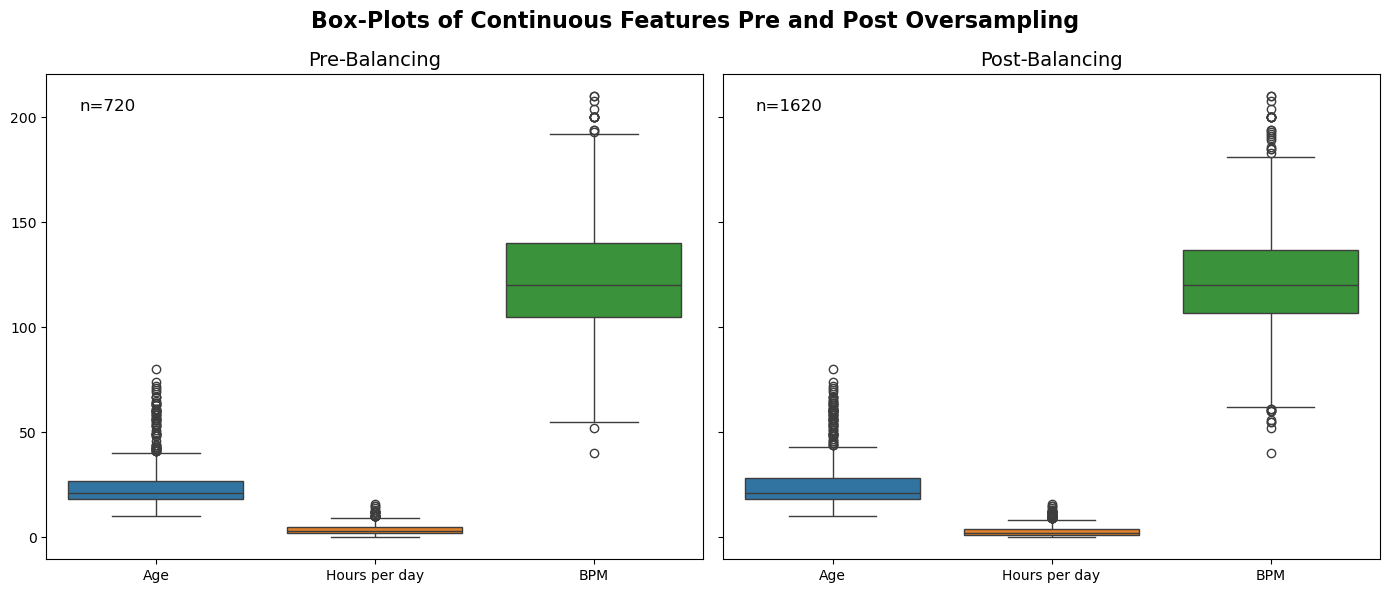

In [300]:
# Plot continuous feature boxplots pre and post imputation

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))

continuous_features = ['Age', 'Hours per day', 'BPM']

fig.suptitle('Box-Plots of Continuous Features Pre and Post Oversampling', fontsize=16, fontweight='bold')

sns.boxplot(df[continuous_features], ax=ax[0])
ax[0].set_title('Pre-Balancing', fontsize=14)
ax[0].text(0.05, 0.95, f"n={len(df)}", transform=ax[0].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

sns.boxplot(resampled_df[continuous_features], ax=ax[1])
ax[1].set_title('Post-Balancing', fontsize=14)
ax[1].text(0.05, 0.95, f"n={len(resampled_df)}", transform=ax[1].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'pre_post_balancing_continuous.png', dpi=300, bbox_inches='tight')
plt.show()

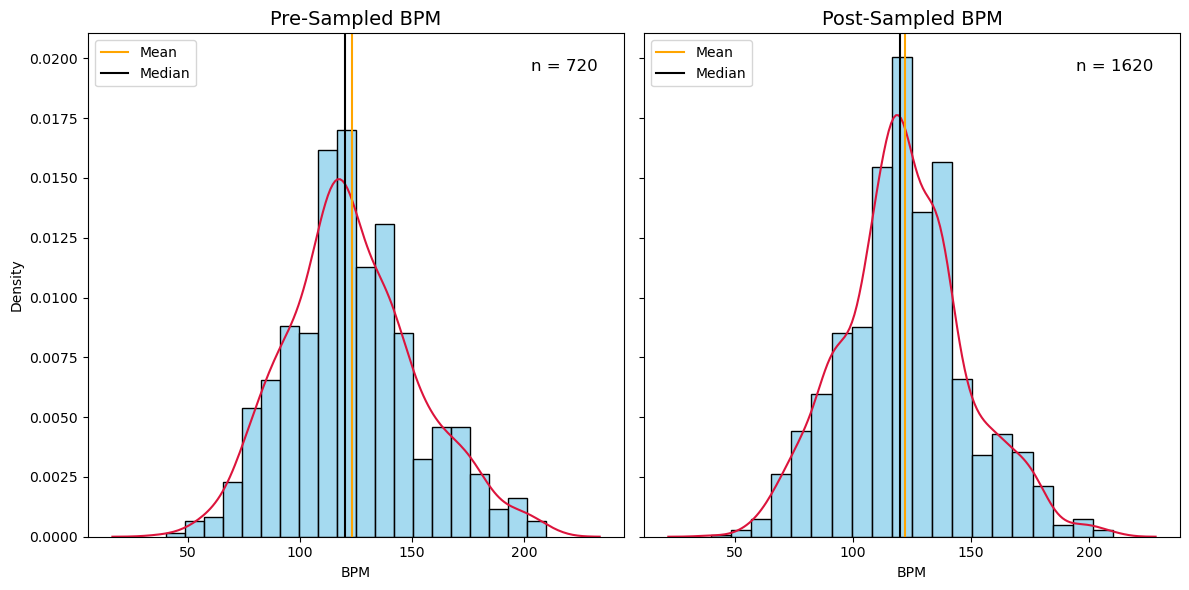

In [301]:
# Plot distributions of BPM pre and post imputation

pre_sampling_mean = np.mean(df['BPM'])
pre_sampling_median = np.median(df['BPM'])
post_sampling_mean = np.mean(resampled_df['BPM'])
post_sampling_median = np.median(resampled_df['BPM'])

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

axes = ax.flatten()

axes[0].set_title('Pre-Sampled BPM', fontsize=14)
sns.histplot(df['BPM'], stat='density', ax=axes[0], color='skyblue', bins=20)
sns.kdeplot(df['BPM'], ax=axes[0], color='crimson')
axes[0].axvline(pre_sampling_mean, color='orange', label='Mean')
axes[0].axvline(pre_sampling_median, color='black', label='Median')
axes[0].legend()
axes[0].text(0.95, 0.95, f'n = {len(df)}', transform=axes[0].transAxes,
           fontsize=12, verticalalignment='top', horizontalalignment='right')

axes[1].set_title('Post-Sampled BPM', fontsize=14)
sns.histplot(resampled_df['BPM'], stat='density', color='skyblue', bins=20, ax=axes[1])
sns.kdeplot(resampled_df['BPM'], color='crimson', ax=axes[1])
axes[1].axvline(post_sampling_mean, color='orange', label='Mean')
axes[1].axvline(post_sampling_median, color='black', label='Median')
axes[1].legend()
axes[1].text(0.95, 0.95, f'n = {len(resampled_df)}', transform=axes[1].transAxes,
           fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'pre_post_oversample_bpm.png', dpi=300, bbox_inches='tight')
plt.show()

It appears like the normal curve post-oversampling is **slightly altered**. Normality will be verified using **Q-Q plots** of both datasets.

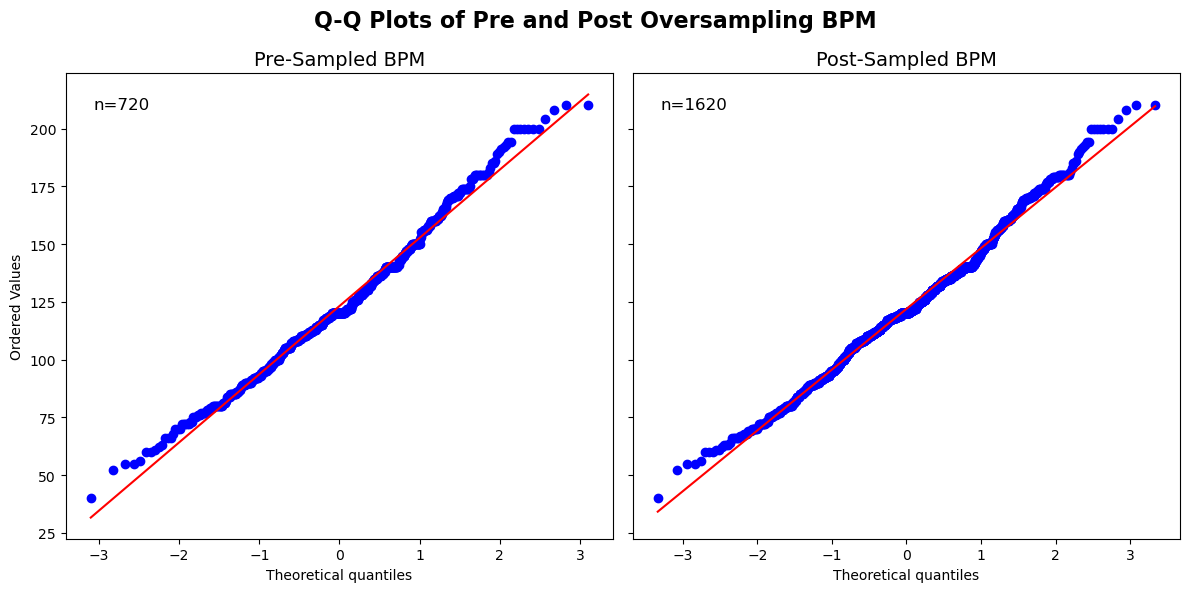

In [302]:
# Plot qq plots to verify normality

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

axes = ax.flatten()

fig.suptitle('Q-Q Plots of Pre and Post Oversampling BPM', fontsize=16, fontweight='bold')

plt.sca(axes[0])
stats.probplot(df['BPM'], dist='norm', plot=plt)
axes[0].set_title('Pre-Sampled BPM', fontsize=14)
axes[0].text(0.05, 0.95, s=f"n={len(df)}", transform=axes[0].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.sca(axes[1])
stats.probplot(resampled_df['BPM'], dist='norm', plot=plt)
axes[1].set_title('Post-Sampled BPM', fontsize=14)
axes[1].set_ylabel('')
axes[1].text(0.05, 0.95, s=f"n={len(resampled_df)}", transform=axes[1].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'qq_pre_post_oversampling_bpm.png', dpi=300, bbox_inches='tight')
plt.show()

#### Summary
- The distribution of `BPM` pre and post oversampling remains identical aside for a **higher central tendency**.
- `BPM` remains **normally distributed** post oversampling.

### Categorical Features

#### Frequency

In [303]:
freq_cols = [col for col in df.columns if col.startswith('Frequency ')]

df[freq_cols]

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0
1,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0
2,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0
3,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,3.0,0.0
716,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,2.0
717,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
718,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [304]:
# Unpivot data for plotting

melted_df = df[freq_cols].melt(var_name='Genre', value_name='Frequency')
melted_resampled_df = resampled_df[freq_cols].melt(var_name='Genre', value_name='Frequency')
melted_df['Genre'] = melted_df['Genre'].str.strip('Frequency ').str.slice(1, -1)
melted_resampled_df['Genre'] = melted_resampled_df['Genre'].str.strip('Frequency ').str.slice(1, -1)

In [305]:
# Combine into one df

melted_df['Source'] = 'Pre-Sampling'
melted_resampled_df['Source'] = 'Post-Sampling'

combined_df = pd.concat([melted_df, melted_resampled_df])

<Figure size 1200x600 with 0 Axes>

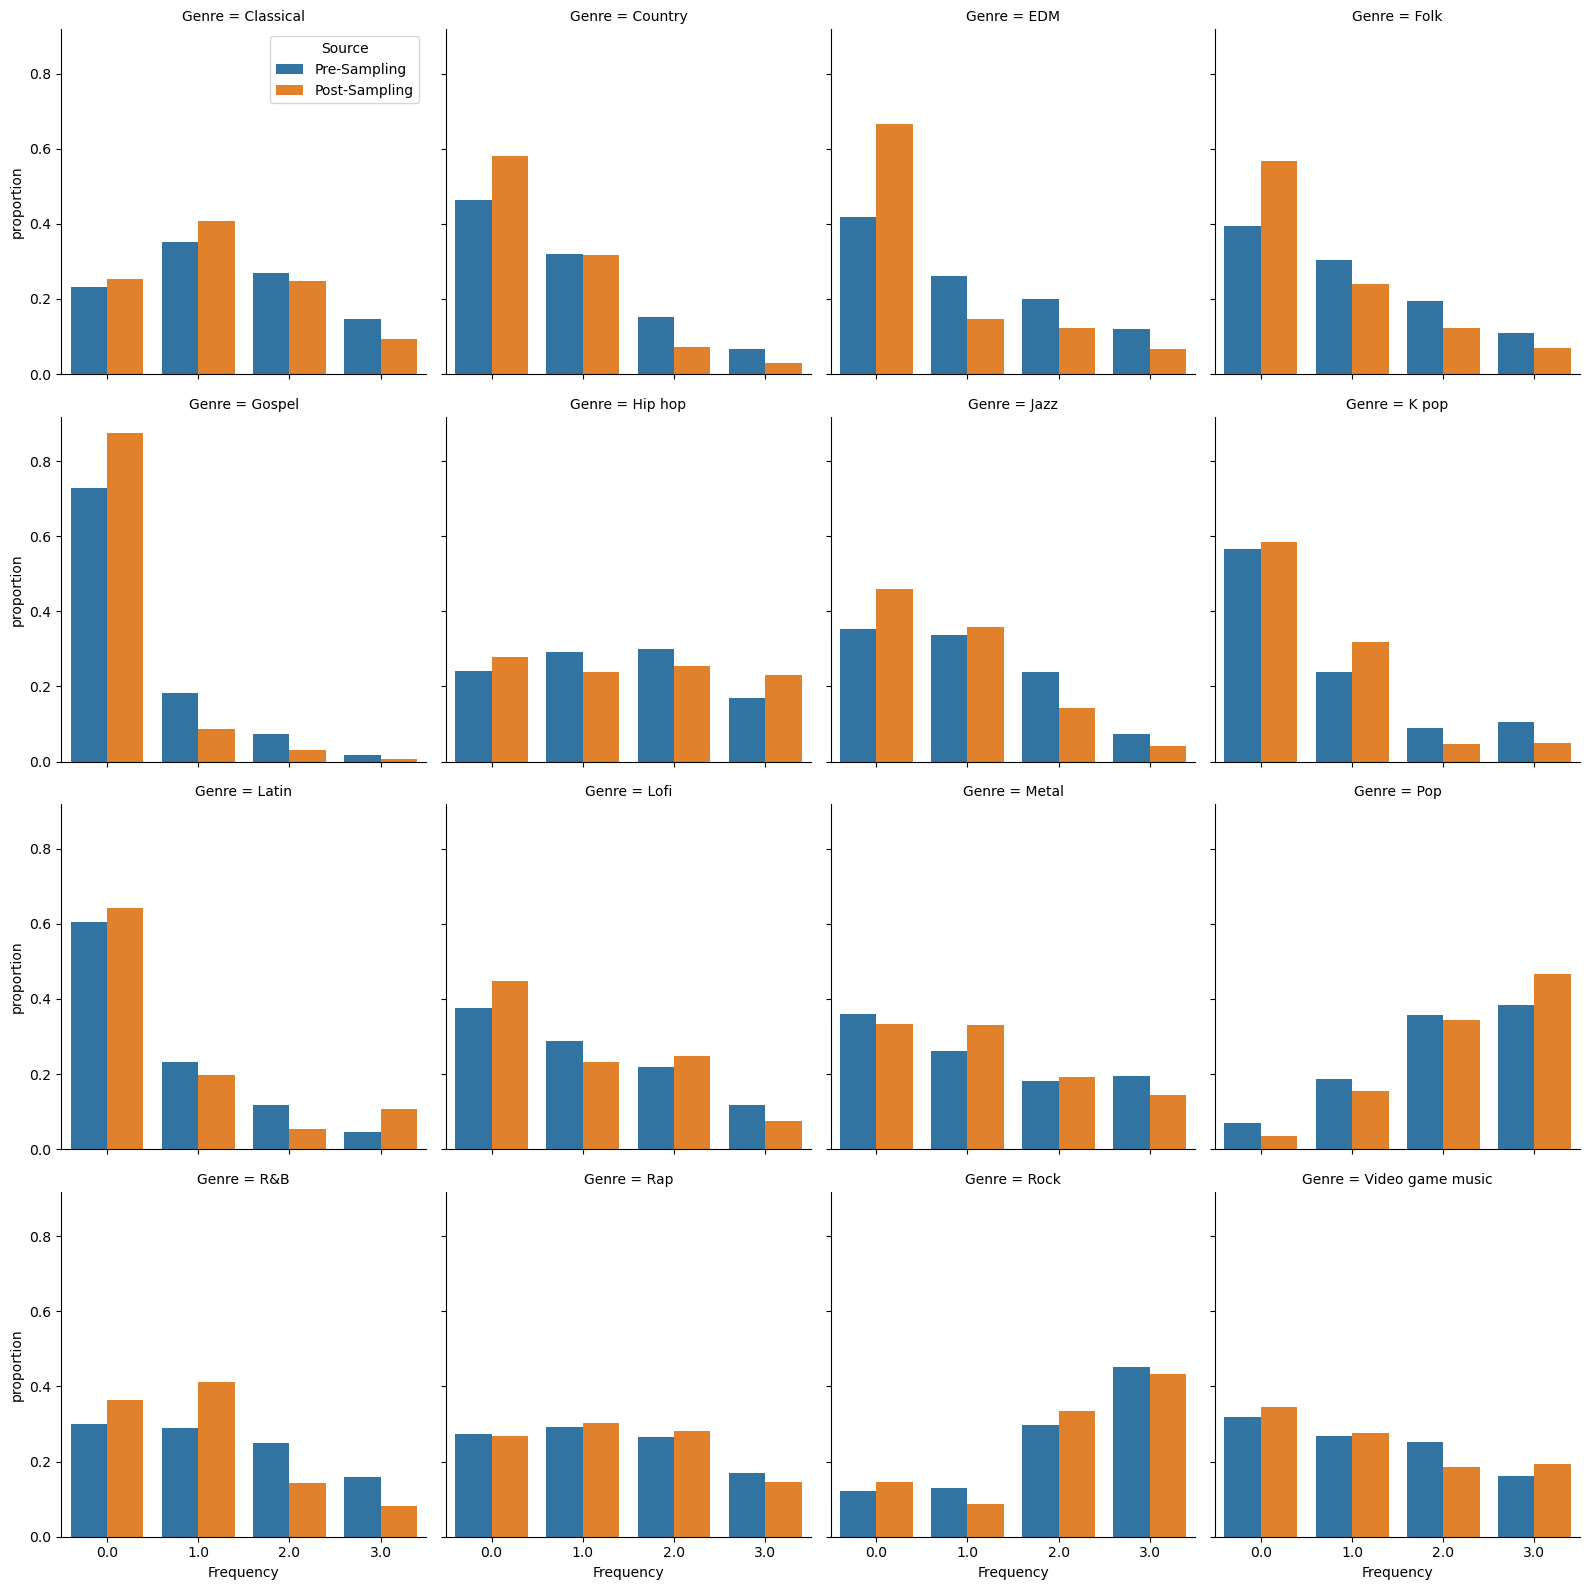

In [306]:
# Plot proportions from both datasets for comparison
grouped_combined = combined_df.groupby(by=['Source', 'Genre']).value_counts(normalize=True).reset_index()

plt.figure(figsize=(12, 6))

sns.catplot(
    data=grouped_combined,
    x='Frequency',
    y='proportion',
    kind='bar',
    col='Genre',
    col_wrap=4,
    hue='Source',
    hue_order=['Pre-Sampling', 'Post-Sampling'],
    height=4,
    dodge=True,
    legend_out=False
)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'bar_pre_post_sampling.png', dpi=300, bbox_inches='tight')
plt.show()

#### Illness

In [307]:
# Prepare data for plotting in long form

illness_cols = ['Anxiety', 'OCD', 'Depression', 'Insomnia']

melted_df = df[illness_cols].melt(var_name='Illness', value_name='Rank')
melted_resampled_df = resampled_df[illness_cols].melt(var_name='Illness', value_name='Rank')
melted_df['Source'] = 'Pre-Sampling'
melted_resampled_df['Source'] = 'Post-Sampling'

# Combine into one dataframe
combined_df = pd.concat([melted_df, melted_resampled_df])

# Convert rank to string since ordinal not continuous
combined_df['Rank'] = combined_df['Rank'].astype(int).astype(str)

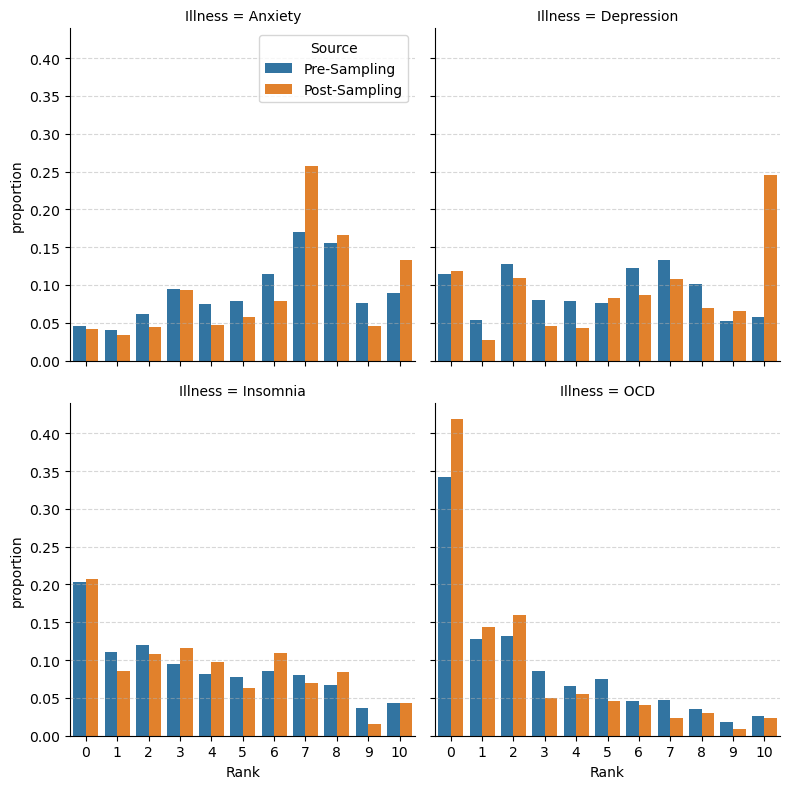

In [308]:
# Plot illness data pre and post imputation for comparison
grouped_combined = combined_df.groupby(by=['Illness', 'Source']).value_counts(normalize=True).reset_index()

plot = sns.catplot(
    data=grouped_combined,
    x='Rank',
    y='proportion',
    col='Illness',
    col_wrap=2,
    kind='bar',
    hue='Source',
    hue_order=['Pre-Sampling', 'Post-Sampling'],
    order=list(range(11)),
    height=4,
    legend_out=False,
)

for ax in plot.axes:
    ax.grid(axis='y', alpha=0.5, linestyle='--')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'illness_pre_post_sampling.png', dpi=300, bbox_inches='tight')
plt.show()

#### Summary
- Genre frequency distributions were **notably altered** after SMOTE-NC oversampling.
  - For example, the proportion of respondents who never listened to EDM **increased** from approximately 40% to over 60%, while the proportions of other frequency categories declined.
- In the majority of categorical features, SMOTE-NC smoothed the distribution, reducing the presence of extreme or sparse categories.
- Certain categorical values experienced disproportionate increases, which may introduce bias or affect model interpretability:
- The proportion of participants with a `Depression` score of 10 **increased** from 5% to 25%.
- The proportion with an `Anxiety` score of 7 **increased** from ~17% to ~27%.